In [1]:
# Import
import pandas as pd
import geopandas as gp
import contextily as cx
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from scipy import stats
sb.set() # set the default Seaborn style for graphics

Dataset is from: https://www.kaggle.com/datasets/kartik2112/fraud-detection

In this project, we are using a dataset of credit card transactions. The data gives us a number of variables including location, time, and specifics of the transaction and user. It provides us with a binary 'target' variable of whether or not a given transaction is fraudulent. Therefore, we use a number of binary classification machine learning models to observe, learn, and predict which data points are fraud.

# I. Data Preparation

For data preparation, we import our data as a pandas dataframe and print some basic summary info and statistics regarding our dataset.

In [2]:
# Set basic settings for pandas
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
# Import data from local files
train = pd.read_csv('fraudTrain.csv', index_col=False)
test = pd.read_csv('fraudTest.csv', index_col=False)
data = pd.concat([train, test])
data.drop('Unnamed: 0', axis=1, inplace=True)
data

trans_date_trans_time            cc_num                            merchant        category     amt      first     last gender                        street            city state    zip      lat      long  city_pop                                job         dob                         trans_num   unix_time  merch_lat  merch_long  is_fraud
0        2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann        misc_net    4.97   Jennifer    Banks      F                561 Perry Cove  Moravian Falls    NC  28654  36.0788  -81.1781      3495          Psychologist, counselling  1988-03-09  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315         0
1        2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme     grocery_pos  107.23  Stephanie     Gill      F  43039 Riley Greens Suite 393          Orient    WA  99160  48.8878 -118.2105       149  Special educational needs teacher  1978-06-21  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462         0
2        2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   entertainment  220.11     Edward  Sanchez      M      594 White Dale Suite 530      Malad City    ID  83252  42.1808 -112.2620      4154        Nature conservation officer  1962-01-19  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481         0
3        2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   gas_transport   45.00     Jeremy    White      M   9443 Cynthia Court Apt. 038         Boulder    MT  59632  46.2306 -112.1138      1939                    Patent attorney  1967-01-12  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071         0
4        2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist        misc_pos   41.96      Tyler   Garcia      M              408 Bradley Rest        Doe Hill    VA  24433  38.4207  -79.4629        99     Dance movement psychotherapist  1986-03-28  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459         0
...                      ...               ...                                 ...             ...     ...        ...      ...    ...                           ...             ...   ...    ...      ...       ...       ...                                ...         ...                               ...         ...        ...         ...       ...
555714   2020-12-31 23:59:07    30560609640617               fraud_Reilly and Sons  health_fitness   43.77    Michael    Olson      M           558 Michael Estates           Luray    MO  63453  40.4931  -91.8912       519                       Town planner  1966-02-13  9b1f753c79894c9f4b71f04581835ada  1388534347  39.946837  -91.333331         0
555715   2020-12-31 23:59:09  3556613125071656                fraud_Hoppe-Parisian       kids_pets  111.84       Jose  Vasquez      M           572 Davis Mountains    Lake Jackson    TX  77566  29.0393  -95.4401     28739                     Futures trader  1999-12-27  2090647dac2c89a1d86c514c427f5b91  1388534349  29.661049  -96.186633         0
555716   2020-12-31 23:59:15  6011724471098086                     fraud_Rau-Robel       kids_pets   86.88        Ann   Lawson      F    144 Evans Islands Apt. 683         Burbank    WA  99323  46.1966 -118.9017      3684                           Musician  1981-11-29  6c5b7c8add471975aa0fec023b2e8408  1388534355  46.658340 -119.715054         0
555717   2020-12-31 23:59:24     4079773899158               fraud_Breitenberg LLC          travel    7.99       Eric  Preston      M    7020 Doyle Stream Apt. 951            Mesa    ID  83643  44.6255 -116.4493       129                       Cartographer  1965-12-15  14392d723bb7737606b2700ac791b7aa  1388534364  44.470525 -117.080888         0
555718   2020-12-31 23:59:34  4170689372027579                   fraud_Dare-Marvin   entertainment   38.13     Samuel     Frey      M      830 Myers Plaza Apt. 384          Edmond

#### **Data Dictionary**
- <b>trans_date_trans_time -></b> Transaction time stamp
- <b>cc_num -></b> Credit card number
- <b>merchant -></b> merchant name
- <b>category -></b> transaction category
- <b>amt -></b> Transaction amount
- <b>first -></b> First name of card holder
- <b>last -></b> Last name of card holder
- <b>gender -></b> Sex of card holder
- <b>street -></b> transaction address
- <b>city -></b> transaction city
- <b>state -></b> transaction state
- <b>zip -></b> transaction zipcode
- <b>lat -></b> transaction lattitude
- <b>long -></b> transaction longitude
- <b>city_pop -></b> Population of the city
- <b>job -></b> job of the card holder
- <b>dob -></b> date of birth of card holder
- <b>trans_num -></b> transaction number of transaction
- <b>unix_time -></b> time in unix format
- <b>merch_lat -></b> lattitude of the merchant
- <b>merch_long -></b> longitude of merchant
- <b>is_fraud -></b> nature of transaction (fraud or not fraud)

In [4]:
# Print data types
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int6

In [5]:
# Find shape of data
print(f'Size of dataframe: {data.shape}')

Size of dataframe: (1852394, 22)


In [6]:
# Summary statistics for numerical data columns
data.describe()

cc_num           amt           zip           lat          long      city_pop     unix_time     merch_lat    merch_long      is_fraud
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06
mean   4.173860e+17  7.006357e+01  4.881326e+04  3.853931e+01 -9.022783e+01  8.864367e+04  1.358674e+09  3.853898e+01 -9.022794e+01  5.210015e-03
std    1.309115e+18  1.592540e+02  2.688185e+04  5.071470e+00  1.374789e+01  3.014876e+05  1.819508e+07  5.105604e+00  1.375969e+01  7.199217e-02
min    6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01 -1.656723e+02  2.300000e+01  1.325376e+09  1.902742e+01 -1.666716e+02  0.000000e+00
25%    1.800429e+14  9.640000e+00  2.623700e+04  3.466890e+01 -9.679800e+01  7.410000e+02  1.343017e+09  3.474012e+01 -9.689944e+01  0.000000e+00
50%    3.521417e+15  4.745000e+01  4.817400e+04  3.935430e+01 -8.747690e+01  2.443000e+03  1.357089e+09  3.936890e+01 -8.744069e+01  0.000000e+00
75%    4.642255e+15  8.310000e+01  7.204200e+04  4.194040e+01 -8.015800e+01  2.032800e+04  1.374581e+09  4.195626e+01 -8.024511e+01  0.000000e+00
max    4.992346e+18  2.894890e+04  9.992100e+04  6.669330e+01 -6.795030e+01  2.906700e+06  1.388534e+09  6.751027e+01 -6.695090e+01  1.000000e+00

In [7]:
# Print shape of data
print(f'Shape of Data: {data.shape}')

Shape of Data: (1852394, 22)


---

# II. Data Exploration

For the second section of the project, we are trying to gain a basic understanding of the variables in our dataset. We look at each variable individually and create visualizations to describe the data. 

We will explore the following columns:
- State
- trans_date_trans_time
- age
- amt
- gender
- category
- merchant

In [8]:
# Check the number of unique values in the dataset
data.nunique()

trans_date_trans_time    1819551
cc_num                       999
merchant                     693
category                      14
amt                        60616
first                        355
last                         486
gender                         2
street                       999
city                         906
state                         51
zip                          985
lat                          983
long                         983
city_pop                     891
job                          497
dob                          984
trans_num                1852394
unix_time                1819583
merch_lat                1754157
merch_long               1809753
is_fraud                       2
dtype: int64

In [9]:
data['long']

0         -81.1781
1        -118.2105
2        -112.2620
3        -112.1138
4         -79.4629
            ...   
555714    -91.8912
555715    -95.4401
555716   -118.9017
555717   -116.4493
555718    -97.4798
Name: long, Length: 1852394, dtype: float64

## State

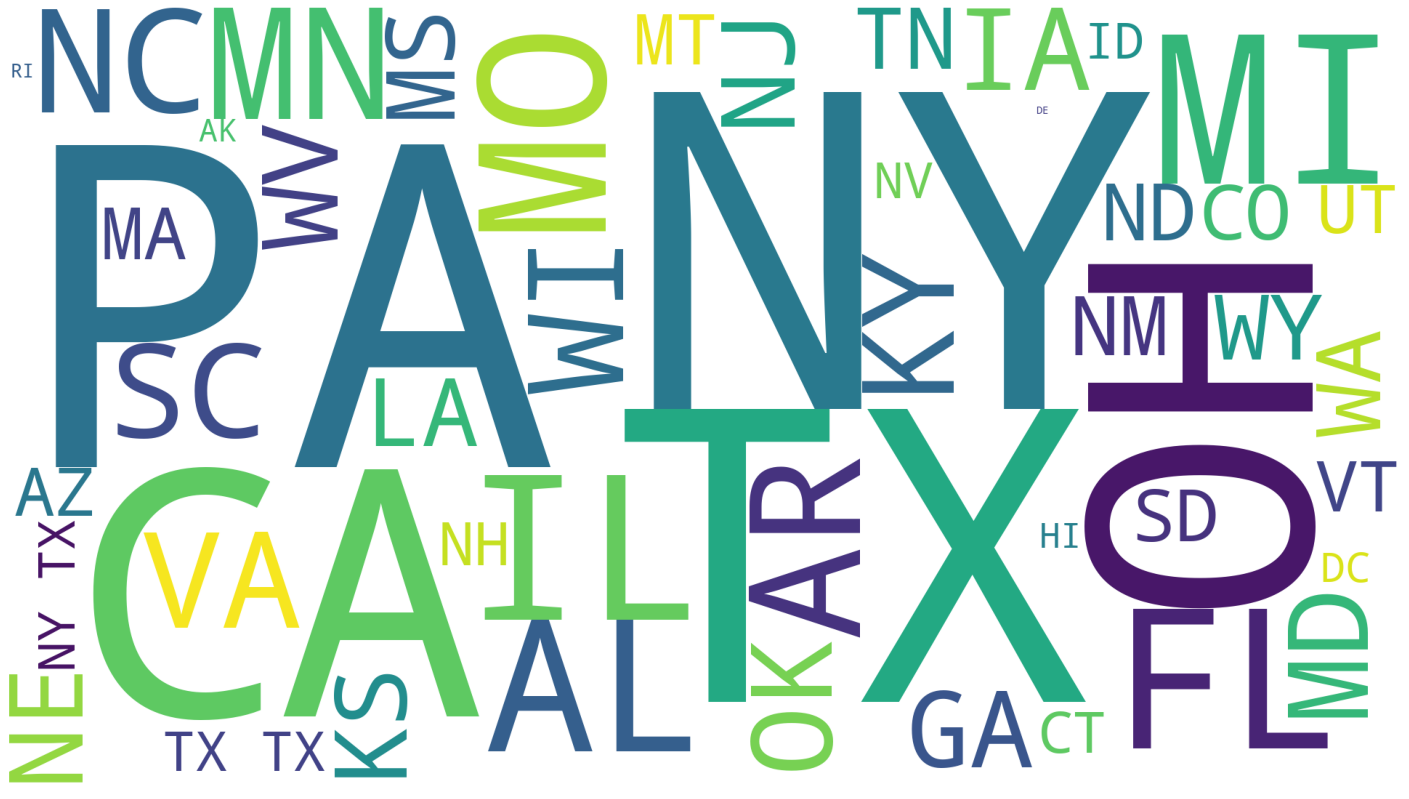

In [10]:
# Use a wordcloud to get a sense of the states with the most amount of transactions
from wordcloud import WordCloud
plt.subplots(figsize=(25,15))

wordcloud = WordCloud(background_color='white',width=1920,height=1080).generate(" ".join(data.state))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

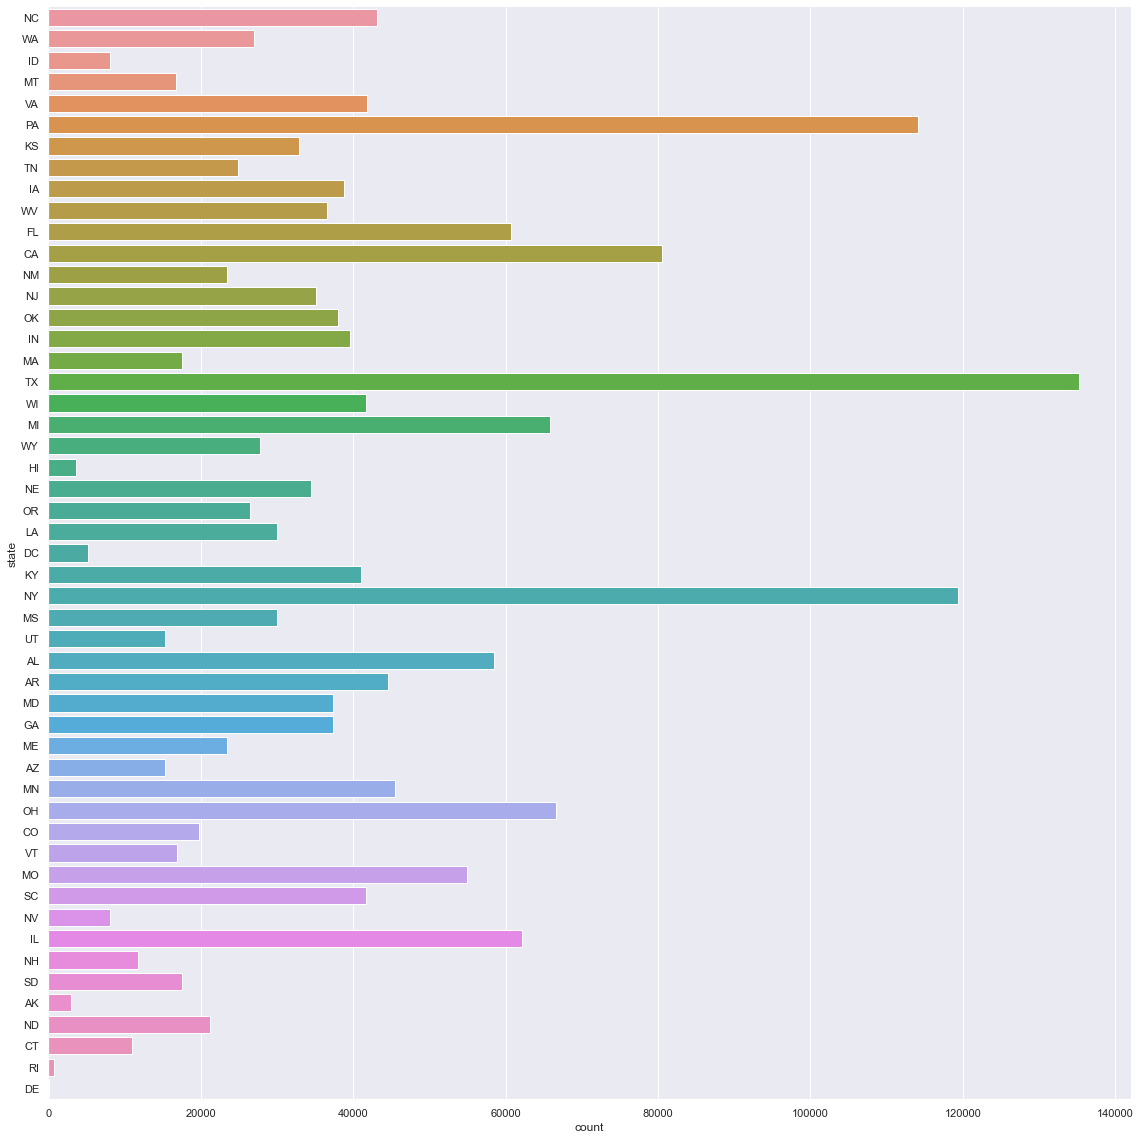

In [11]:
# Look at the distribution of values
sb.catplot(y = "state", 
           data = data, kind = "count", height = 16)

Since there are so many states, we shall just look at the top 20 states

In [12]:
# Fetching the states with highest transaction frequecy
top_trans_states = data.state.value_counts().head(20).index.tolist()
print(top_trans_states)

['TX', 'NY', 'PA', 'CA', 'OH', 'MI', 'IL', 'FL', 'AL', 'MO', 'MN', 'AR', 'NC', 'VA', 'WI', 'SC', 'KY', 'IN', 'IA', 'OK']


In [13]:
100*data[data.state.isin(top_trans_states)].state.value_counts(
    normalize=True)

TX    10.961858
NY     9.677414
PA     9.252292
CA     6.523111
OH     5.399284
MI     5.334292
IL     5.041503
FL     4.925052
AL     4.742394
MO     4.449281
MN     3.681776
AR     3.615163
NC     3.495470
VA     3.383801
WI     3.382342
SC     3.381775
KY     3.320997
IN     3.204141
IA     3.144578
OK     3.083476
Name: state, dtype: float64

/Users/xinyuwu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


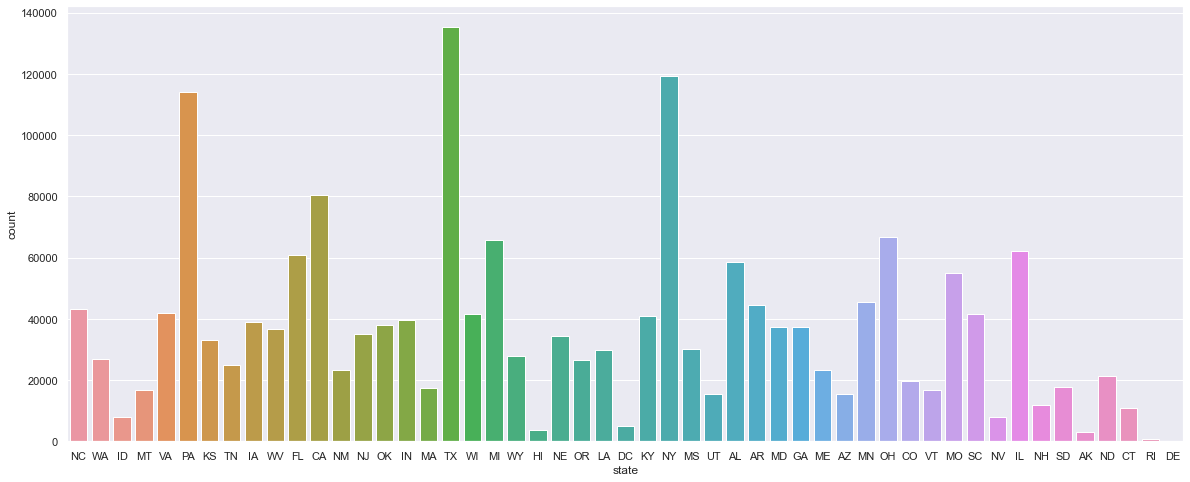

In [14]:
# Understand city, zip and state features
fig, ax = plt.subplots(figsize=(20,8))

# Plot state feature
plot = sb.countplot(data.state)
plt.show()

In [15]:
# Create a table that shows the top 20 fraudulent groups of the input categorical feature and their respective fraudulent pecentages
def createDistribution(feat):
    # Create the state-transaction count distribution, the number of total transactions in each state
    df = data[[feat,'trans_num']].groupby([feat]).count().reset_index()
    df.columns = [feat, 'feat_total_trans_count']

    # Create the state-fraud distribution, the number of fraud transactions in each state
    df_fraud = data[[feat, 'trans_num', 'is_fraud']].groupby([feat,'is_fraud']).count().reset_index()
    df_fraud.columns = [feat, 'is_fraud', 'fraud_count']

    # Merge the two together to get a fraudulent percentage for each state
    df_fraud = df_fraud.merge(df[[feat, 'feat_total_trans_count']], how='inner', on=feat)
    df_fraud['fraud_percentage'] = (df_fraud['fraud_count']/df_fraud['feat_total_trans_count'])*100

    return df_fraud

In [16]:
# Show the top fraudulent states and their respective fraudulent percentage
# Show the top 20 states with high fraudulent transactions
df_fraud = createDistribution("state")
top_20 = df_fraud[df_fraud['is_fraud'] == 1].sort_values(by = ['fraud_percentage'], ascending=False).head(20)
top_20

state  is_fraud  fraud_count  feat_total_trans_count  fraud_percentage
16    DE         1            9                       9        100.000000
78    RI         1           15                     745          2.013423
1     AK         1           50                    2963          1.687479
74    OR         1          197                   26408          0.745986
60    NH         1           79                   11727          0.673659
90    VA         1          273                   41756          0.653798
84    TN         1          159                   24913          0.638221
58    NE         1          216                   34425          0.627451
46    MN         1          280                   45433          0.616292
68    NY         1          730                  119419          0.611293
15    DC         1           31                    5130          0.604288
32    KS         1          193                   32939          0.585932
66    NV         1           47                    8058          0.583271
11    CO         1          115                   19766          0.581807
42    ME         1          134                   23433          0.571843
80    SC         1          236                   41731          0.565527
50    MS         1          169                   30021          0.562939
18    FL         1          334                   60775          0.549568
30    IN         1          217                   39539          0.548825
20    GA         1          204                   37340          0.546331

<AxesSubplot:xlabel='state', ylabel='fraud_percentage'>

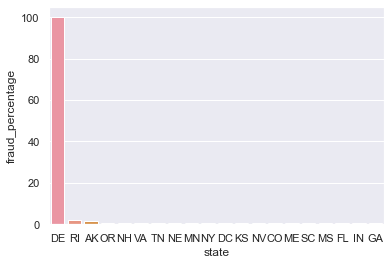

In [17]:
# Plot the fraudulent transactions percentage by binning
sb.barplot(data=top_20, x="state", y="fraud_percentage")

We observe that the majority of the states have fraudulent percentage under 3%, while all the transactions recorded in the state DE are fraudulent cases. Therefore, it is important to monitor the top fraudulent-percentage states. 

## Trans_date_trans_time --> Age

Find new 'age' variable by converting 'dob' column to datetime

In [18]:
# Convert trans_date_trans_time into datetime
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
print(data.dtypes['trans_date_trans_time'])
data.head()

datetime64[ns]


trans_date_trans_time            cc_num                            merchant       category     amt      first     last gender                        street            city state    zip      lat      long  city_pop                                job         dob                         trans_num   unix_time  merch_lat  merch_long  is_fraud
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer    Banks      F                561 Perry Cove  Moravian Falls    NC  28654  36.0788  -81.1781      3495          Psychologist, counselling  1988-03-09  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315         0
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie     Gill      F  43039 Riley Greens Suite 393          Orient    WA  99160  48.8878 -118.2105       149  Special educational needs teacher  1978-06-21  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462         0
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge  entertainment  220.11     Edward  Sanchez      M      594 White Dale Suite 530      Malad City    ID  83252  42.1808 -112.2620      4154        Nature conservation officer  1962-01-19  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481         0
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy    White      M   9443 Cynthia Court Apt. 038         Boulder    MT  59632  46.2306 -112.1138      1939                    Patent attorney  1967-01-12  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071         0
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   Garcia      M              408 Bradley Rest        Doe Hill    VA  24433  38.4207  -79.4629        99     Dance movement psychotherapist  1986-03-28  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459         0

In [19]:
# Convert dob and transaction date time to datetime
data['dob'] = pd.to_datetime(data['dob'])

# Subtract to get the age of the client
data['age'] = np.round((data['trans_date_trans_time'] - 
                        data['dob'])/ np.timedelta64(1, 'Y'))
data.age.head()

0    31.0
1    41.0
2    57.0
3    52.0
4    33.0
Name: age, dtype: float64

In [20]:
# Derive additonal columns from 'trans_date_trans_time'
# Derive hour
data['trans_hour'] = data['trans_date_trans_time'].dt.hour
# Derive 'day of the week'
data['trans_day_of_week'] = data['trans_date_trans_time'].dt.day_name()
# Derive 'year_month'
data['trans_year_month'] = data['trans_date_trans_time'].dt.to_period('M')

data.head()

trans_date_trans_time            cc_num                            merchant       category     amt      first     last gender                        street            city state    zip      lat      long  city_pop                                job        dob                         trans_num   unix_time  merch_lat  merch_long  is_fraud   age  trans_hour trans_day_of_week trans_year_month
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer    Banks      F                561 Perry Cove  Moravian Falls    NC  28654  36.0788  -81.1781      3495          Psychologist, counselling 1988-03-09  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315         0  31.0           0           Tuesday          2019-01
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie     Gill      F  43039 Riley Greens Suite 393          Orient    WA  99160  48.8878 -118.2105       149  Special educational needs teacher 1978-06-21  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462         0  41.0           0           Tuesday          2019-01
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge  entertainment  220.11     Edward  Sanchez      M      594 White Dale Suite 530      Malad City    ID  83252  42.1808 -112.2620      4154        Nature conservation officer 1962-01-19  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481         0  57.0           0           Tuesday          2019-01
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy    White      M   9443 Cynthia Court Apt. 038         Boulder    MT  59632  46.2306 -112.1138      1939                    Patent attorney 1967-01-12  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071         0  52.0           0           Tuesday          2019-01
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   Garcia      M              408 Bradley Rest        Doe Hill    VA  24433  38.4207  -79.4629        99     Dance movement psychotherapist 1986-03-28  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459         0  33.0           0           Tuesday          2019-01

- Now, since we have extracted separate variables from the 'trans_date_trans_time' column, it is safe to drop the column, since it does not provide us any additonal information.
- And, since we have also extracted the age of the customers, we can safely remove the 'dob' variable too since it does not provide us any additonal information in this context.
- Also, the variables 'first', 'last' contain personally identifiable information. These features cause privacy concerns and moreover are not necessary in the context of our analysis. Therefore, we will drop these variables too.

/Users/xinyuwu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


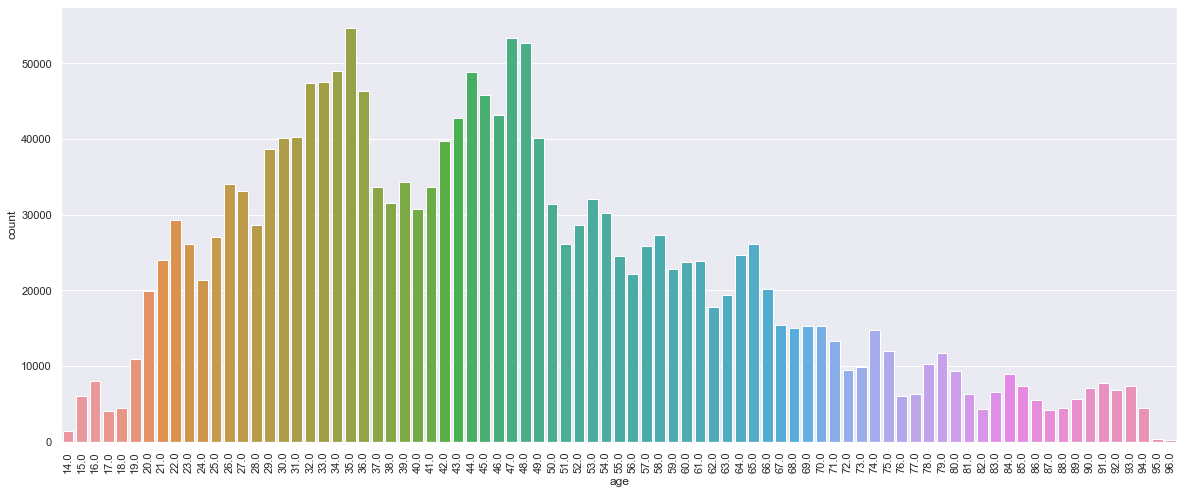

In [21]:
# Plot the age feature in the data
fig, ax = plt.subplots(figsize=(20,8))

plot = sb.countplot(data.age)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

plt.show()

In [22]:
# Observe the min and max values of variable age
min_value = data['age'].min()
max_value = data['age'].max()
print(f'Minimum Age: {min_value}')
print(f'Maximum Age: {max_value}')

Minimum Age: 14.0
Maximum Age: 96.0


In [23]:
# Put the ages into 5 bins
bins = np.linspace(min_value,max_value,6)
bins

array([14. , 30.4, 46.8, 63.2, 79.6, 96. ])

In [24]:
# Create labels for the bins
labels = ['14-30', '31-46', '47-63', '64-79', '80-96']
data['age'] = pd.cut(data['age'], bins=bins, labels=labels, include_lowest=True)

In [25]:
# Observe that the age data is now grouped into bins
data['age'].head()

0    31-46
1    31-46
2    47-63
3    47-63
4    31-46
Name: age, dtype: category
Categories (5, object): ['14-30' < '31-46' < '47-63' < '64-79' < '80-96']

In [26]:
# Show the top fraudulent age bins and their respective fraudulent percentage
df = createDistribution("age")
df

age  is_fraud  fraud_count  feat_total_trans_count  fraud_percentage
0  14-30         0       355435                  357316         99.473575
1  14-30         1         1881                  357316          0.526425
2  31-46         0       667259                  669905         99.605019
3  31-46         1         2646                  669905          0.394981
4  47-63         0       499360                  502453         99.384420
5  47-63         1         3093                  502453          0.615580
6  64-79         0       224283                  225645         99.396397
7  64-79         1         1362                  225645          0.603603
8  80-96         0        96406                   97075         99.310842
9  80-96         1          669                   97075          0.689158

<AxesSubplot:xlabel='age', ylabel='fraud_count'>

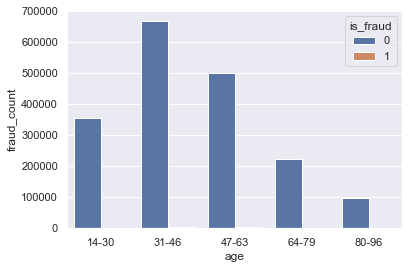

In [27]:
# Plot the fraudulent transactions percentage by binning
sb.barplot(data=df, x="age", y="fraud_count", hue='is_fraud')

In the above graph, we can barely see the fraud count for fraud cases in the age groups. We observe that the fraudulent percentage are very small across all age groups. People over 47 are prone to have more fraudulent transactions, where as people in the 80+ age group are most likely to have fraudulent transactions (might be easier targets by fraudsters due to their lack of financial knowledge).

## amt

In [28]:
# Look at distribution of amount
pd.concat(
    [data['amt'].describe(percentiles = [0.5,0.95,0.999]).reset_index().rename(columns={'index': 'Row Type', 'amt':'Overall Amt Distribution'}),
     data.loc[data['is_fraud']==0,['amt']].describe(percentiles = [0.5,0.95,0.999]).reset_index(drop = 1).rename(columns={'amt':'Non-Fraud Amt Distribution'}),
     data.loc[data['is_fraud']==1,['amt']].describe(percentiles = [0.5,0.95,0.999]).reset_index(drop = 1).rename(columns={'amt':'Fraud Amt Distribution'})], axis=1)

Row Type  Overall Amt Distribution  Non-Fraud Amt Distribution  Fraud Amt Distribution
0    count              1.852394e+06                1.842743e+06             9651.000000
1     mean              7.006357e+01                6.765128e+01              530.661412
2      std              1.592540e+02                1.535481e+02              391.028873
3      min              1.000000e+00                1.000000e+00                1.060000
4      50%              4.745000e+01                4.724000e+01              390.000000
5      95%              1.953400e+02                1.895900e+02             1084.090000
6    99.9%              1.517241e+03                1.519623e+03             1293.127000
7      max              2.894890e+04                2.894890e+04             1376.040000

The most important thing we notice that the mean of non-fraud amount is way less than the mean of fraud amount, so is the std, 50% and 95%. This shows that non-fraud amount is on average less than fraud amounts. 

/Users/xinyuwu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


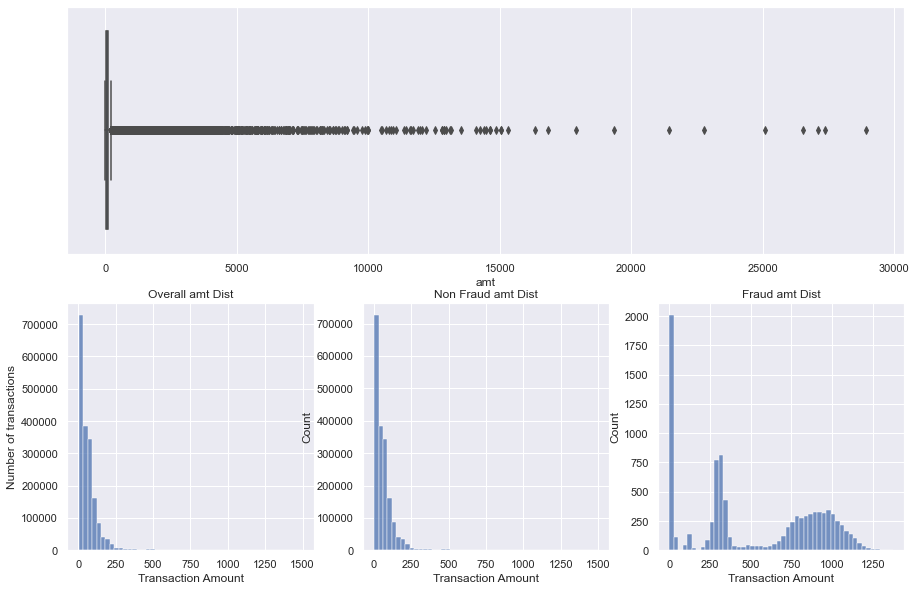

In [29]:
# Plot the above distributions
fig = plt.subplots(figsize=(15,10))

plots = []
# Plot the amt feature
# Create a boxplot
plots.append(sb.boxplot(data.amt, ax=plt.subplot(211)))

# Distribution plots
plots.append(sb.histplot(data[data.amt <= 1500].amt, bins=50, ax=plt.subplot(234)))
plots.append(sb.histplot(data[(data.is_fraud==0) & (data.amt<=1500)].amt, bins=50, ax=plt.subplot(235)))
plots.append(sb.histplot(data[(data.is_fraud==1) & (data.amt<=1500)].amt, bins=50, ax=plt.subplot(236)))

# Setting titles
plots[1].set_title('Overall amt Dist')
plots[2].set_title('Non Fraud amt Dist')
plots[3].set_title('Fraud amt Dist')

# Setting x labels
plots[1].set_xlabel('Transaction Amount')
plots[2].set_xlabel('Transaction Amount')
plots[3].set_xlabel('Transaction Amount')

# Setting y label
plots[1].set_ylabel('Number of transactions')

plt.show()

From the first graph, we can see that the overall amount distribution has a lot of outliers. After seeing the distributino of the overall amount, non-fraud amount, and fraud amount, we notice that the fraud transaction amount has a lot of data on the right side of the graph, which means more data that have higher amount. All the graphs are negatively skewed. 

## Gender

/Users/xinyuwu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/xinyuwu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/xinyuwu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warn

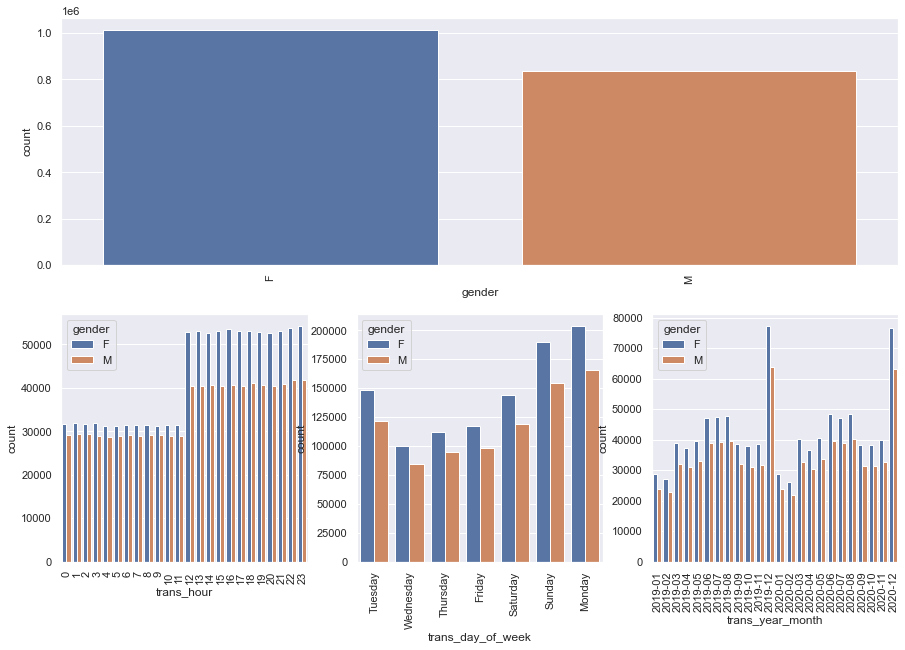

In [30]:
fig, ax = plt.subplots(figsize=(15,10))

plot = [0,0,0,0]
# Plot gender demographic with respect to transactions
plot[0] = sb.countplot(data.gender, ax=plt.subplot(211))

# Plot transactions over time, with respect to gender
plot[1] = sb.countplot(data.trans_hour, hue=data.gender, ax=plt.subplot(234))
plot[2] = sb.countplot(data.trans_day_of_week, hue=data.gender, ax=plt.subplot(235))
plot[3] = sb.countplot(data.trans_year_month, hue=data.gender, ax=plt.subplot(236))

for i in plot:
    i.set_xticklabels(i.get_xticklabels(), rotation=90)
plt.show()

- From the graphs above, we can see that there are more transactions done by female than male. 
- time wise, the most transaction amounts happen after 12pm in a day, during the beginning and the end of a week, and near the end of a year. 

In [31]:
df = createDistribution("gender")
df

gender  is_fraud  fraud_count  feat_total_trans_count  fraud_percentage
0      F         0      1009850                 1014749         99.517221
1      F         1         4899                 1014749          0.482779
2      M         0       832893                  837645         99.432695
3      M         1         4752                  837645          0.567305

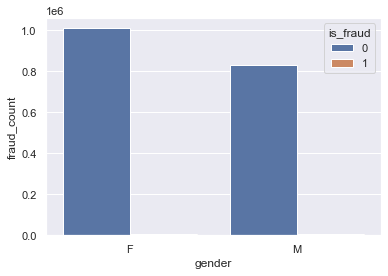

In [32]:
sb.barplot(data=df, y='fraud_count', x='gender', hue='is_fraud')

plt.show()

Again, we observe that there are more non-fraud cases compared to fraud cases. However, comparatively, more fraud cases are commited by male (0.56%) than female (0.48%).

## Category

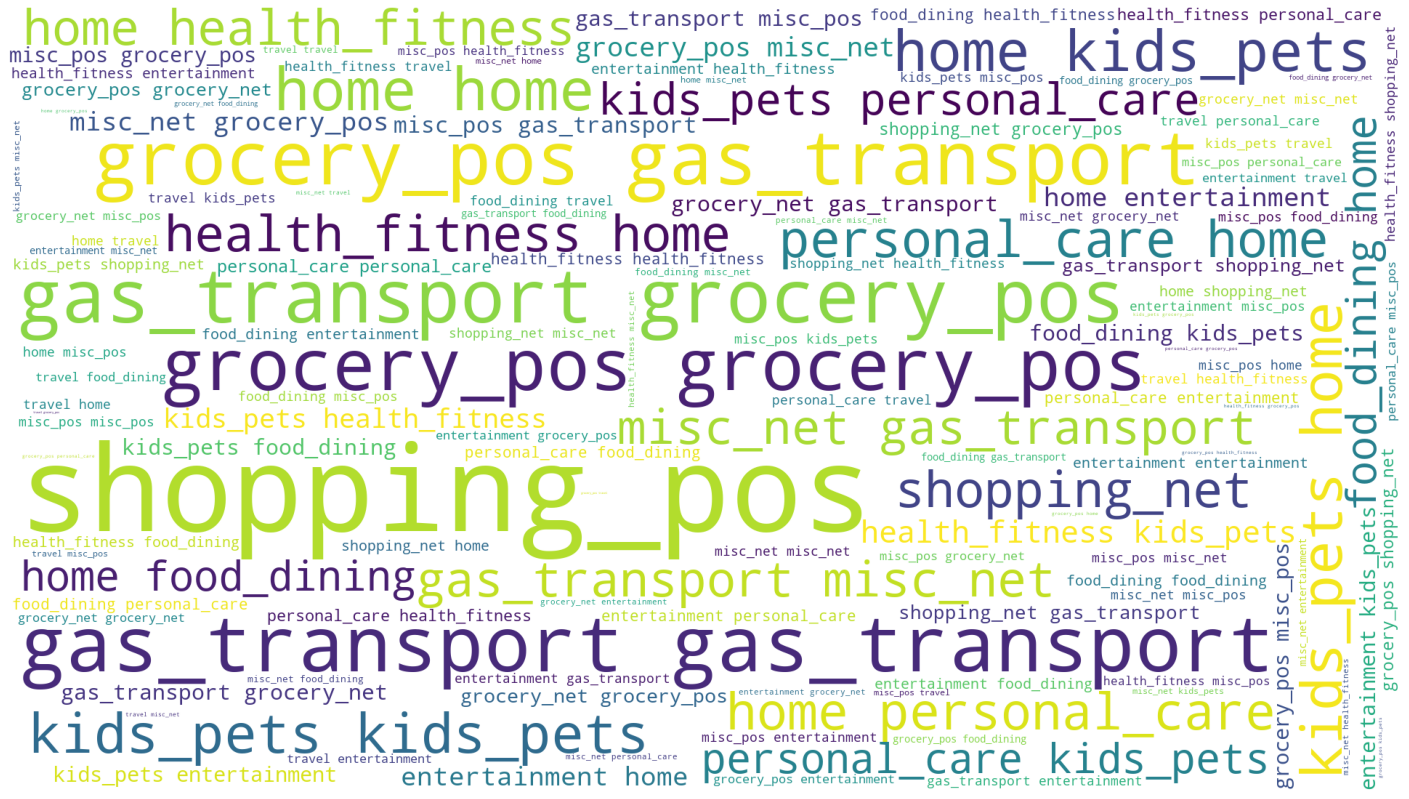

In [33]:
plt.subplots(figsize=(25,15))

wordcloud = WordCloud(background_color='white',width=1920,height=1080).generate(" ".join(data.category))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [34]:
# Explore the values in variable category
data.category.value_counts(normalize=True)

gas_transport     0.101506
grocery_pos       0.095115
home              0.094721
shopping_pos      0.089864
kids_pets         0.087307
shopping_net      0.075212
entertainment     0.072403
food_dining       0.070573
personal_care     0.070225
health_fitness    0.066159
misc_pos          0.061666
misc_net          0.048939
grocery_net       0.035024
travel            0.031287
Name: category, dtype: float64

/Users/xinyuwu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


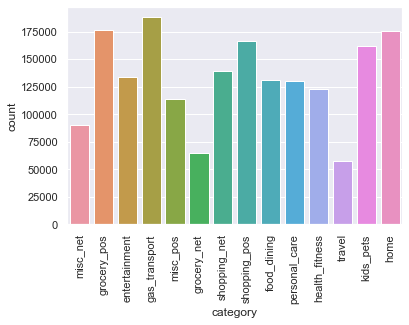

In [35]:
# Plotting those variables
plot = sb.countplot(data.category)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

plt.show()

In [36]:
df = createDistribution('category')
df

category  is_fraud  fraud_count  feat_total_trans_count  fraud_percentage
0    entertainment         0       133826                  134118         99.782281
1    entertainment         1          292                  134118          0.217719
2      food_dining         0       130524                  130729         99.843187
3      food_dining         1          205                  130729          0.156813
4    gas_transport         0       187257                  188029         99.589425
5    gas_transport         1          772                  188029          0.410575
6      grocery_net         0        64703                   64878         99.730263
7      grocery_net         1          175                   64878          0.269737
8      grocery_pos         0       173963                  176191         98.735463
9      grocery_pos         1         2228                  176191          1.264537
10  health_fitness         0       122368                  122553         99.849045
11  health_fitness         1          185                  122553          0.150955
12            home         0       175195                  175460         99.848968
13            home         1          265                  175460          0.151032
14       kids_pets         0       161423                  161727         99.812029
15       kids_pets         1          304                  161727          0.187971
16        misc_net         0        89472                   90654         98.696141
17        misc_net         1         1182                   90654          1.303859
18        misc_pos         0       113907                  114229         99.718110
19        misc_pos         1          322                  114229          0.281890
20   personal_care         0       129795                  130085         99.777069
21   personal_care         1          290                  130085          0.222931
22    shopping_net         0       137103                  139322         98.407287
23    shopping_net         1         2219                  139322          1.592713
24    shopping_pos         0       165407                  166463         99.365625
25    shopping_pos         1         1056                  166463          0.634375
26          travel         0        57800                   57956         99.730830
27          travel         1          156                   57956          0.269170

/Users/xinyuwu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


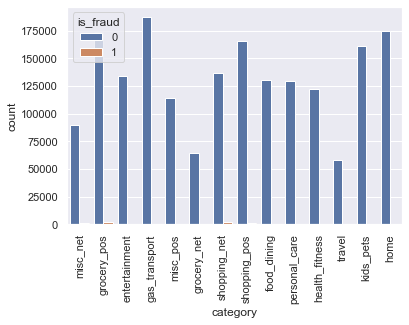

In [37]:
# Plot the number of fraudulent transactions in these categories
plot = sb.countplot(data.category, hue=data.is_fraud)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

plt.show()

we observe that most fraud percentage are less than 1%. however, there are some categories with fraud percentage more than 1%. 

In [38]:
# Find the categories with more than 1% fraudulent transactions
df.loc[(df.is_fraud == 1) & (df['fraud_percentage'] >= 1)].category

9      grocery_pos
17        misc_net
23    shopping_net
Name: category, dtype: object

## Merchant

In [39]:
# Check the number of unique categories in this variable
data.merchant.nunique()

693

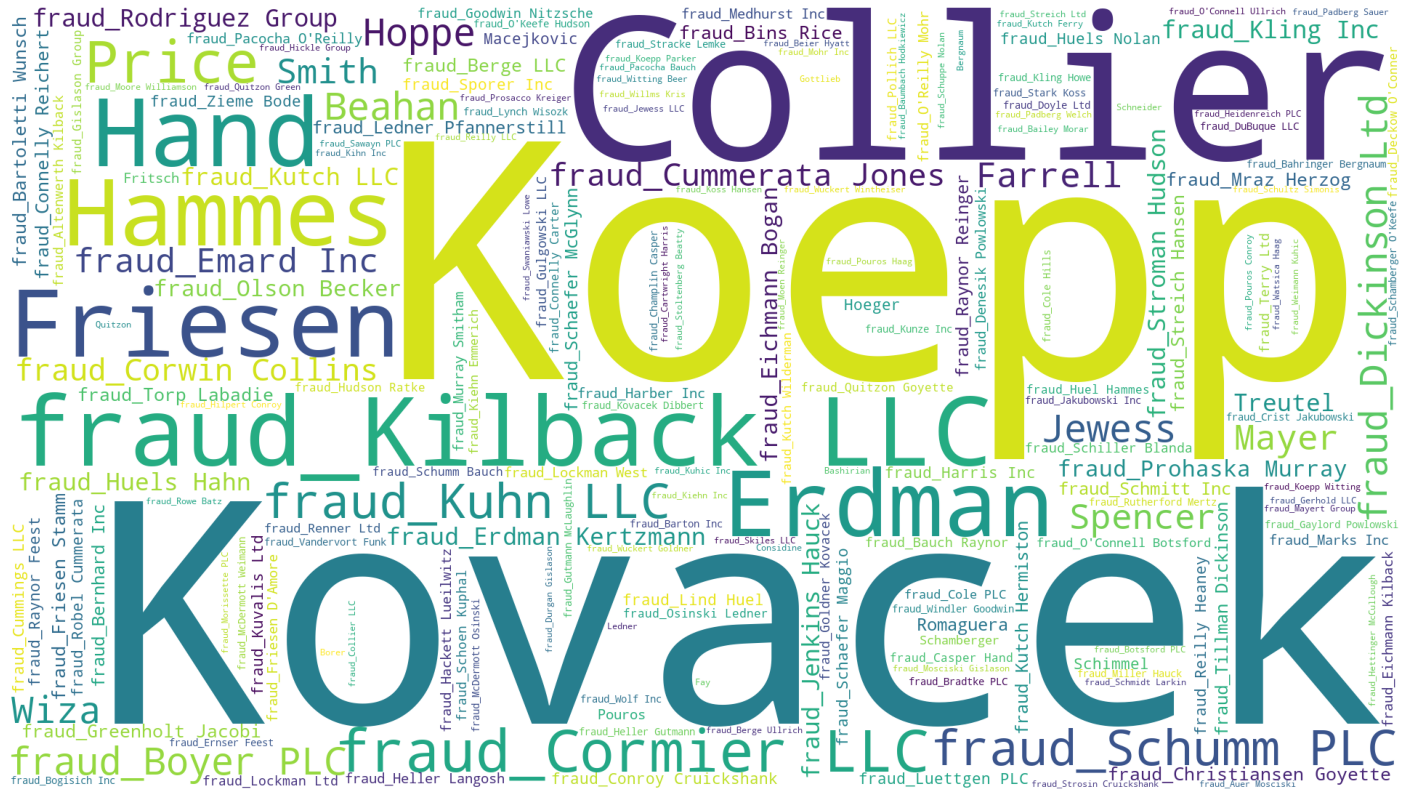

In [40]:
# Use a word cloud to get a sense of the merchants where the most transactions happen
plt.subplots(figsize=(25,15))

wordcloud = WordCloud(background_color='white',width=1920,height=1080).generate(" ".join(data.merchant))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Since the merchant variable has more than 600 categories, we will just display the top 20.

In [41]:
high_trans_merchants = data.merchant.value_counts().head(20).index.tolist()
high_trans_merchants

['fraud_Kilback LLC',
 'fraud_Cormier LLC',
 'fraud_Schumm PLC',
 'fraud_Kuhn LLC',
 'fraud_Boyer PLC',
 'fraud_Dickinson Ltd',
 'fraud_Emard Inc',
 'fraud_Cummerata-Jones',
 'fraud_Corwin-Collins',
 'fraud_Rodriguez Group',
 'fraud_Kling Inc',
 'fraud_Parisian and Sons',
 'fraud_Erdman-Kertzmann',
 'fraud_Huels-Hahn',
 'fraud_Stroman, Hudson and Erdman',
 'fraud_Kutch LLC',
 'fraud_Jenkins, Hauck and Friesen',
 'fraud_Prohaska-Murray',
 'fraud_Olson, Becker and Koch',
 'fraud_Eichmann, Bogan and Rodriguez']

/Users/xinyuwu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


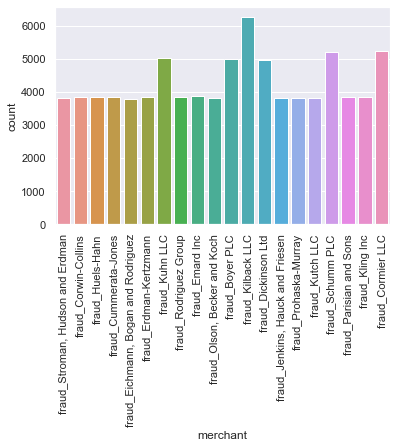

In [42]:
# Plot the top merchants with high transaction volumes
plot = sb.countplot(data[data.merchant.isin(high_trans_merchants)].merchant)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

plt.show()

In [43]:
df = createDistribution('merchant')
#viewing the top 20 merchant with high fraudulent transaction volumes
df[df['is_fraud'] == 1].sort_values(by = ['fraud_percentage'], ascending=False).head(20)

merchant  is_fraud  fraud_count  feat_total_trans_count  fraud_percentage
673                            fraud_Kozey-Boehm         1           60                    2758          2.175489
490            fraud_Herman, Treutel and Dickens         1           38                    1870          2.032086
1226                            fraud_Terry-Huel         1           56                    2864          1.955307
607                        fraud_Kerluke-Abshire         1           50                    2635          1.897533
884          fraud_Mosciski, Ziemann and Farrell         1           53                    2821          1.878766
1105         fraud_Schmeler, Bashirian and Price         1           52                    2788          1.865136
691                              fraud_Kuhic LLC         1           53                    2842          1.864884
563                               fraud_Jast Ltd         1           51                    2757          1.849837
743         fraud_Langworth, Boehm and Gulgowski         1           52                    2817          1.845935
1051  fraud_Romaguera, Cruickshank and Greenholt         1           51                    2767          1.843151
145                         fraud_Boyer-Reichert         1           51                    2779          1.835193
476          fraud_Heathcote, Yost and Kertzmann         1           51                    2786          1.830581
401                            fraud_Goyette Inc         1           50                    2773          1.803101
771                          fraud_Lemke-Gutmann         1           50                    2790          1.792115
840                           fraud_Medhurst PLC         1           48                    2746          1.747997
985                           fraud_Rau and Sons         1           60                    3546          1.692047
474                          fraud_Heathcote LLC         1           47                    2778          1.691865
299                            fraud_Durgan-Auer         1           31                    1846          1.679307
419       fraud_Greenholt, O'Hara and Balistreri         1           46                    2743          1.676996
866               fraud_Moore, Dibbert and Koepp         1           31                    1850          1.675676

Since the top 20 fraud-committing merchants all have fraud percentage of above 1, let's explore how many merchants have that percentage above 1 and 2

In [44]:
len(df.loc[(df['is_fraud']==1) & (df['fraud_percentage']>=1)].merchant)

139

In [45]:
len(df.loc[(df['is_fraud']==1) & (df['fraud_percentage']>=2)].merchant)

2

There are 139 merchants that have more than 1% fraud rate and 2 merchants that have more than 2%

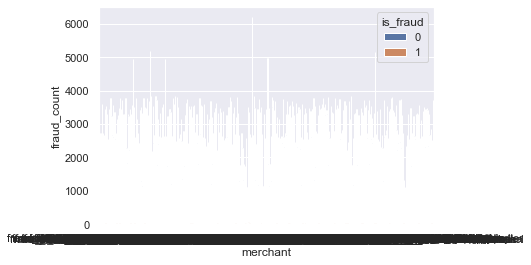

In [46]:
sb.barplot(data=df, y='fraud_count', x='merchant', hue='is_fraud')
plot.set_xticklabels(plot.get_xticklabels(), rotation = 90)
plt.show()

## Job

In [47]:
# Check the number of unique categories in this variable

data.job.nunique()

497

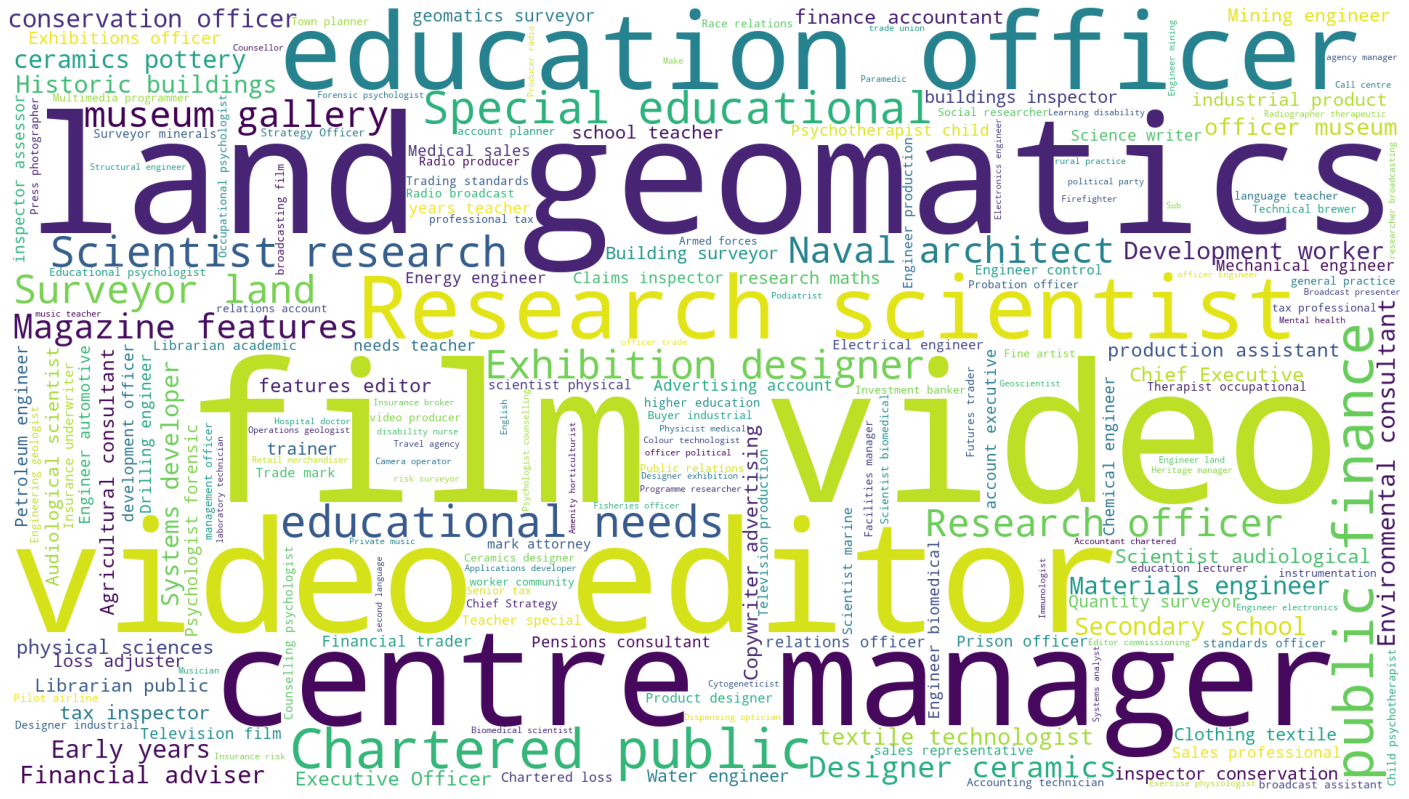

In [48]:
# Use a word cloud to get a sense of the merchants where the most transactions happen
plt.subplots(figsize=(25,15))

wordcloud = WordCloud(background_color='white',width=1920,height=1080).generate(" ".join(data.job))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [49]:
# Fetching top 20 jobs with high transaction frequencies
high_trans_jobs = data.job.value_counts().head(20).index.tolist()
print(high_trans_jobs)

['Film/video editor', 'Exhibition designer', 'Surveyor, land/geomatics', 'Naval architect', 'Materials engineer', 'Designer, ceramics/pottery', 'Environmental consultant', 'Financial adviser', 'Systems developer', 'IT trainer', 'Copywriter, advertising', 'Scientist, audiological', 'Chartered public finance accountant', 'Chief Executive Officer', 'Podiatrist', 'Comptroller', 'Magazine features editor', 'Agricultural consultant', 'Paramedic', 'Sub']


/Users/xinyuwu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


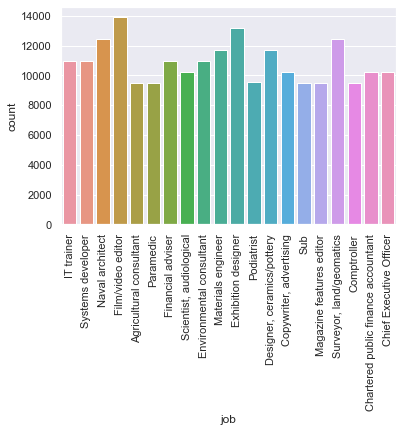

In [50]:
# Plot the transaction counts in the top 20 jobs
plot = sb.countplot(data[data.job.isin(high_trans_jobs)].job)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.show()

In [51]:
df = createDistribution('job')
# View the jobs with 100% fraudulent transactions
df[(df['is_fraud'] == 1) & (df['fraud_percentage'] == 100)]

job  is_fraud  fraud_count  feat_total_trans_count  fraud_percentage
2                Accountant, chartered         1           11                      11             100.0
39              Air traffic controller         1           17                      17             100.0
68      Armed forces technical officer         1            8                       8             100.0
99                Broadcast journalist         1            9                       9             100.0
118                    Careers adviser         1           15                      15             100.0
207         Contracting civil engineer         1            7                       7             100.0
228                             Dancer         1           19                      19             100.0
335                     Engineer, site         1           12                      12             100.0
340                    Engineer, water         1            8                       8             100.0
393            Forest/woodland manager         1            9                       9             100.0
444                          Homeopath         1           11                      11             100.0
475                   Industrial buyer         1           10                      10             100.0
478                Information officer         1            8                       8             100.0
521                    Legal secretary         1           12                      12             100.0
624      Operational investment banker         1           11                      11             100.0
651                  Personnel officer         1           12                      12             100.0
796  Sales promotion account executive         1           14                      14             100.0
827                        Ship broker         1            7                       7             100.0
834                  Software engineer         1           11                      11             100.0
837                          Solicitor         1           11                      11             100.0
947                 Veterinary surgeon         1            8                       8             100.0
956                  Warehouse manager         1            7                       7             100.0

In [52]:
# Check how many of those professions there are
len(df[(df['is_fraud'] == 1) & (df['fraud_percentage'] == 100)])

22

There are 22 jobs that have 100% fraud rate. 

## y variable: is_fraud

In [53]:
# Summary Statistics for Legendary Train
data["is_fraud"].value_counts()

0    1842743
1       9651
Name: is_fraud, dtype: int64

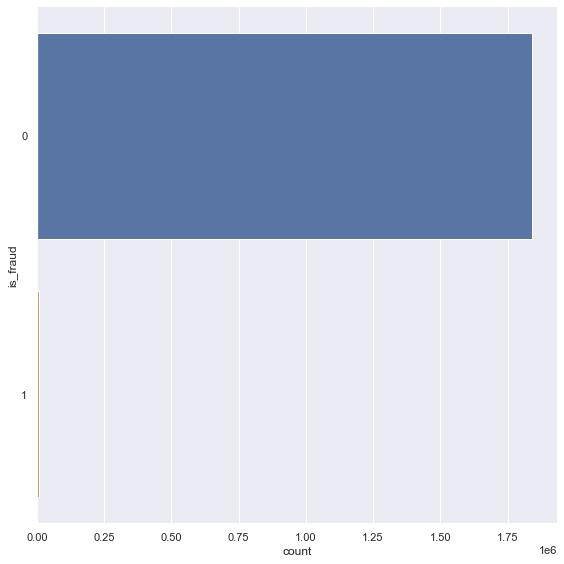

In [54]:
sb.catplot(y = "is_fraud", data = data, kind = "count", height = 8)

# III. Data Cleaning

In order to optimize model training, we clean the data of any null values and outliers.

In [55]:
# Check the correlation among each variable, and focus on each variable's correlation with the isFraud variable
data.corr()

cc_num       amt       zip       lat      long  city_pop  unix_time  merch_lat  merch_long  is_fraud  trans_hour
cc_num      1.000000  0.001826  0.041504 -0.058744 -0.048429 -0.009118   0.000284  -0.058415   -0.048421 -0.001125   -0.000902
amt         0.001826  1.000000  0.001979 -0.000670 -0.000735  0.004921  -0.002411  -0.000613   -0.000711  0.209308   -0.024891
zip         0.041504  0.001979  1.000000 -0.114554 -0.909795  0.077601   0.001017  -0.113934   -0.908981 -0.002190    0.005947
lat        -0.058744 -0.000670 -0.114554  1.000000 -0.014744 -0.154816   0.000741   0.993582   -0.014709  0.002904   -0.011259
long       -0.048429 -0.000735 -0.909795 -0.014744  1.000000 -0.052359  -0.000574  -0.014585    0.999118  0.001022   -0.002082
city_pop   -0.009118  0.004921  0.077601 -0.154816 -0.052359  1.000000  -0.001636  -0.153863   -0.052329  0.000325    0.019949
unix_time   0.000284 -0.002411  0.001017  0.000741 -0.000574 -0.001636   1.000000   0.000696   -0.000571 -0.013329    0.000571
merch_lat  -0.058415 -0.000613 -0.113934  0.993582 -0.014585 -0.153863   0.000696   1.000000   -0.014554  0.002778   -0.011119
merch_long -0.048421 -0.000711 -0.908981 -0.014709  0.999118 -0.052329  -0.000571  -0.014554    1.000000  0.000999   -0.002120
is_fraud   -0.001125  0.209308 -0.002190  0.002904  0.001022  0.000325  -0.013329   0.002778    0.000999  1.000000    0.013196
trans_hour -0.000902 -0.024891  0.005947 -0.011259 -0.002082  0.019949   0.000571  -0.011119   -0.002120  0.013196    1.000000

In [56]:
# Check null values 
data.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
age                      0
trans_hour               0
trans_day_of_week        0
trans_year_month         0
dtype: int64

In [57]:
# Find the skewness for the numerical variables
feature_names = ["amt", "city_pop"]
for i in range(len(feature_names)):
        print(f"{feature_names[i]} skew: {data[feature_names[i]].skew()}")

amt skew: 40.81280917629574
city_pop skew: 5.590804561529247


In [58]:
def outliers(feature):
    """ Find outliers given a feature name"""
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    outliers = data.index[((data[feature]<(q1 - 1.5*(q3-q1))) | (data[feature] > (q3 + 1.5 * (q3-q1))))].tolist()
    return outliers

def remove_outliers_zscore(col_name):
    return data[(np.abs(stats.zscore(data[col_name])) < 3)]

In [59]:
# Check the number of outliers each numerical column has and remove them
str = ["amt", "zip", "city_pop"]
for item in str:
    print(item, "outliers: ", len(outliers(item)))
    data.drop(outliers(item))
    remove_outliers_zscore(item)

amt outliers:  95054
zip outliers:  0
city_pop outliers:  346191


In [60]:
# Check the correlation again
data.corr() 

cc_num       amt       zip       lat      long  city_pop  unix_time  merch_lat  merch_long  is_fraud  trans_hour
cc_num      1.000000  0.001826  0.041504 -0.058744 -0.048429 -0.009118   0.000284  -0.058415   -0.048421 -0.001125   -0.000902
amt         0.001826  1.000000  0.001979 -0.000670 -0.000735  0.004921  -0.002411  -0.000613   -0.000711  0.209308   -0.024891
zip         0.041504  0.001979  1.000000 -0.114554 -0.909795  0.077601   0.001017  -0.113934   -0.908981 -0.002190    0.005947
lat        -0.058744 -0.000670 -0.114554  1.000000 -0.014744 -0.154816   0.000741   0.993582   -0.014709  0.002904   -0.011259
long       -0.048429 -0.000735 -0.909795 -0.014744  1.000000 -0.052359  -0.000574  -0.014585    0.999118  0.001022   -0.002082
city_pop   -0.009118  0.004921  0.077601 -0.154816 -0.052359  1.000000  -0.001636  -0.153863   -0.052329  0.000325    0.019949
unix_time   0.000284 -0.002411  0.001017  0.000741 -0.000574 -0.001636   1.000000   0.000696   -0.000571 -0.013329    0.000571
merch_lat  -0.058415 -0.000613 -0.113934  0.993582 -0.014585 -0.153863   0.000696   1.000000   -0.014554  0.002778   -0.011119
merch_long -0.048421 -0.000711 -0.908981 -0.014709  0.999118 -0.052329  -0.000571  -0.014554    1.000000  0.000999   -0.002120
is_fraud   -0.001125  0.209308 -0.002190  0.002904  0.001022  0.000325  -0.013329   0.002778    0.000999  1.000000    0.013196
trans_hour -0.000902 -0.024891  0.005947 -0.011259 -0.002082  0.019949   0.000571  -0.011119   -0.002120  0.013196    1.000000

Some of the columns are not important for our analysis, and are sensitive client data, such as trans_date_trans_time, client first name and last name, date of birth, cc_num, trans_num, etc. so we will drop them.

In [61]:
# Dropping variables
data.drop(['trans_date_trans_time','first', 'last', 'dob', 'cc_num', 'trans_num', 'unix_time', 'street', 'merch_long', 'merch_lat'] , 
          axis=1, inplace=True)
data.head()

merchant       category     amt gender            city state    zip      lat      long  city_pop                                job  is_fraud    age  trans_hour trans_day_of_week trans_year_month
0          fraud_Rippin, Kub and Mann       misc_net    4.97      F  Moravian Falls    NC  28654  36.0788  -81.1781      3495          Psychologist, counselling         0  31-46           0           Tuesday          2019-01
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23      F          Orient    WA  99160  48.8878 -118.2105       149  Special educational needs teacher         0  31-46           0           Tuesday          2019-01
2                fraud_Lind-Buckridge  entertainment  220.11      M      Malad City    ID  83252  42.1808 -112.2620      4154        Nature conservation officer         0  47-63           0           Tuesday          2019-01
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00      M         Boulder    MT  59632  46.2306 -112.1138      1939                    Patent attorney         0  47-63           0           Tuesday          2019-01
4                 fraud_Keeling-Crist       misc_pos   41.96      M        Doe Hill    VA  24433  38.4207  -79.4629        99     Dance movement psychotherapist         0  31-46           0           Tuesday          2019-01

In [62]:
# Print updated shape of data
print(f'Shape of Data: {data.shape}')

Shape of Data: (1852394, 16)


# IV. Model Training

For this section, we start using the cleaned data to train some binary classification machine learning models. In order to do so, we must first encode the categorical variables. On top of the base models, we use SMOTE sampling to resample the data and limit the effects of having an imbalanced dataset.

In [64]:
data

merchant        category     amt gender            city state    zip      lat      long  city_pop                                job  is_fraud    age  trans_hour trans_day_of_week trans_year_month
0               fraud_Rippin, Kub and Mann        misc_net    4.97      F  Moravian Falls    NC  28654  36.0788  -81.1781      3495          Psychologist, counselling         0  31-46           0           Tuesday          2019-01
1          fraud_Heller, Gutmann and Zieme     grocery_pos  107.23      F          Orient    WA  99160  48.8878 -118.2105       149  Special educational needs teacher         0  31-46           0           Tuesday          2019-01
2                     fraud_Lind-Buckridge   entertainment  220.11      M      Malad City    ID  83252  42.1808 -112.2620      4154        Nature conservation officer         0  47-63           0           Tuesday          2019-01
3       fraud_Kutch, Hermiston and Farrell   gas_transport   45.00      M         Boulder    MT  59632  46.2306 -112.1138      1939                    Patent attorney         0  47-63           0           Tuesday          2019-01
4                      fraud_Keeling-Crist        misc_pos   41.96      M        Doe Hill    VA  24433  38.4207  -79.4629        99     Dance movement psychotherapist         0  31-46           0           Tuesday          2019-01
...                                    ...             ...     ...    ...             ...   ...    ...      ...       ...       ...                                ...       ...    ...         ...               ...              ...
555714               fraud_Reilly and Sons  health_fitness   43.77      M           Luray    MO  63453  40.4931  -91.8912       519                       Town planner         0  47-63          23          Thursday          2020-12
555715                fraud_Hoppe-Parisian       kids_pets  111.84      M    Lake Jackson    TX  77566  29.0393  -95.4401     28739                     Futures trader         0  14-30          23          Thursday          2020-12
555716                     fraud_Rau-Robel       kids_pets   86.88      F         Burbank    WA  99323  46.1966 -118.9017      3684                           Musician         0  31-46          23          Thursday          2020-12
555717               fraud_Breitenberg LLC          travel    7.99      M            Mesa    ID  83643  44.6255 -116.4493       129                       Cartographer         0  47-63          23          Thursday          2020-12
555718                   fraud_Dare-Marvin   entertainment   38.13      M          Edmond    OK  73034  35.6665  -97.4798    116001                        Media buyer         0  14-30          23          Thursday          2020-12

[1852394 rows x 16 columns]

## Encode Categorical Variables

Before training the machine learning models, we must first encode all of the categorical variables in the dataset. T do so, we both a combination of one-hot encoding and label encoding. Generally, if the number of unique values for a given feature is not too large, we implement one-hot encoding. Label encoding may bias the model into thinking different categories have a hierarchical or other ordering. Thus, we only use it for variables that have too many unique values to encode using one-hot encoding.

In [65]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [66]:
# Define features for either One-Hot or Label Encoder
onehot_features = ['gender', 'category', 'age', 'state', 'trans_hour', 'trans_day_of_week', 'trans_year_month']
label_features = ['merchant', 'job', 'city', 'zip']

In [67]:
# One Hot Encoder
def OneHotEncode(features):
    df_lst = []
    for feature in features:
        df_lst.append(pd.get_dummies(data[feature], prefix=feature, drop_first=True))
    encoded_df = pd.concat(df_lst, axis=1).reset_index().drop('index', axis=1)
    return encoded_df

onehot_df = OneHotEncode(onehot_features)
onehot_df

gender_M  category_food_dining  category_gas_transport  category_grocery_net  category_grocery_pos  category_health_fitness  category_home  category_kids_pets  category_misc_net  category_misc_pos  category_personal_care  category_shopping_net  category_shopping_pos  category_travel  age_31-46  age_47-63  age_64-79  age_80-96  state_AL  state_AR  state_AZ  state_CA  state_CO  state_CT  state_DC  state_DE  state_FL  state_GA  state_HI  state_IA  state_ID  state_IL  state_IN  state_KS  state_KY  state_LA  state_MA  state_MD  state_ME  state_MI  state_MN  state_MO  state_MS  state_MT  state_NC  state_ND  state_NE  state_NH  state_NJ  state_NM  state_NV  state_NY  state_OH  state_OK  state_OR  state_PA  state_RI  state_SC  state_SD  state_TN  state_TX  state_UT  state_VA  state_VT  state_WA  state_WI  state_WV  state_WY  trans_hour_1  trans_hour_2  trans_hour_3  trans_hour_4  trans_hour_5  trans_hour_6  trans_hour_7  trans_hour_8  trans_hour_9  trans_hour_10  trans_hour_11  \
0               0                     0                       0                     0                     0                        0              0                   0                  1                  0                       0                      0                      0                0          1          0          0          0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         1         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0             0             0             0             0             0             0             0             0             0              0              0   
1               0                     0                       0                     0                     1                        0              0                   0                  0                  0                       0                      0                      0                0          1          0          0          0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         1         0         0         0             0             0             0             0             0             0             0             0             0              0              0   
2               1                     0                       0                     0                     0                        0              0                   0                  0                  0                       0                      0                      0                0          0          1          0          0         0         0         0         0         0         0         0         0         0         0         0         0         1         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0             0             0             0             0             0             0             0             0             0              0              0   
3               1        

In [68]:
# Label Encoder
def LabelEncode(features):
    encoder = LabelEncoder()
    df_lst = []
    for feature in features:
        X = data[feature].values.reshape(-1, 1)
        encoded = encoder.fit_transform(X)
        df_lst.append(pd.DataFrame(encoded, columns=[feature]))
    encoded_df = pd.concat(df_lst, axis=1).reset_index().drop('index', axis=1)
    return encoded_df

labelencode_df = LabelEncode(label_features)
labelencode_df

/Users/xinyuwu/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/xinyuwu/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/xinyuwu/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/xinyuwu/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when 

merchant  job  city  zip
0             514  372   532  269
1             241  431   619  979
2             390  308   474  870
3             360  330    84  623
4             297  116   217  234
...           ...  ...   ...  ...
1852389       507  477   471  666
1852390       264  207   427  823
1852391       496  307   110  980
1852392        75   63   508  871
1852393       125  289   239  761

[1852394 rows x 4 columns]

In [69]:
# Combine two encoded dataframes
encoded_df = pd.concat([onehot_df, labelencode_df], axis=1)
encoded_df

gender_M  category_food_dining  category_gas_transport  category_grocery_net  category_grocery_pos  category_health_fitness  category_home  category_kids_pets  category_misc_net  category_misc_pos  category_personal_care  category_shopping_net  category_shopping_pos  category_travel  age_31-46  age_47-63  age_64-79  age_80-96  state_AL  state_AR  state_AZ  state_CA  state_CO  state_CT  state_DC  state_DE  state_FL  state_GA  state_HI  state_IA  state_ID  state_IL  state_IN  state_KS  state_KY  state_LA  state_MA  state_MD  state_ME  state_MI  state_MN  state_MO  state_MS  state_MT  state_NC  state_ND  state_NE  state_NH  state_NJ  state_NM  state_NV  state_NY  state_OH  state_OK  state_OR  state_PA  state_RI  state_SC  state_SD  state_TN  state_TX  state_UT  state_VA  state_VT  state_WA  state_WI  state_WV  state_WY  trans_hour_1  trans_hour_2  trans_hour_3  trans_hour_4  trans_hour_5  trans_hour_6  trans_hour_7  trans_hour_8  trans_hour_9  trans_hour_10  trans_hour_11  \
0               0                     0                       0                     0                     0                        0              0                   0                  1                  0                       0                      0                      0                0          1          0          0          0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         1         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0             0             0             0             0             0             0             0             0             0              0              0   
1               0                     0                       0                     0                     1                        0              0                   0                  0                  0                       0                      0                      0                0          1          0          0          0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         1         0         0         0             0             0             0             0             0             0             0             0             0              0              0   
2               1                     0                       0                     0                     0                        0              0                   0                  0                  0                       0                      0                      0                0          0          1          0          0         0         0         0         0         0         0         0         0         0         0         0         0         1         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0             0             0             0             0             0             0             0             0             0              0              0   
3               1        

In [70]:
# Combine categorical and numerical data into new dataframe
numeric_df = data[['amt', 'lat', 'long', 'city_pop', 'is_fraud']].reset_index().drop('index', axis=1)
finaldata = pd.concat([encoded_df, numeric_df], axis=1)
finaldata

gender_M  category_food_dining  category_gas_transport  category_grocery_net  category_grocery_pos  category_health_fitness  category_home  category_kids_pets  category_misc_net  category_misc_pos  category_personal_care  category_shopping_net  category_shopping_pos  category_travel  age_31-46  age_47-63  age_64-79  age_80-96  state_AL  state_AR  state_AZ  state_CA  state_CO  state_CT  state_DC  state_DE  state_FL  state_GA  state_HI  state_IA  state_ID  state_IL  state_IN  state_KS  state_KY  state_LA  state_MA  state_MD  state_ME  state_MI  state_MN  state_MO  state_MS  state_MT  state_NC  state_ND  state_NE  state_NH  state_NJ  state_NM  state_NV  state_NY  state_OH  state_OK  state_OR  state_PA  state_RI  state_SC  state_SD  state_TN  state_TX  state_UT  state_VA  state_VT  state_WA  state_WI  state_WV  state_WY  trans_hour_1  trans_hour_2  trans_hour_3  trans_hour_4  trans_hour_5  trans_hour_6  trans_hour_7  trans_hour_8  trans_hour_9  trans_hour_10  trans_hour_11  \
0               0                     0                       0                     0                     0                        0              0                   0                  1                  0                       0                      0                      0                0          1          0          0          0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         1         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0             0             0             0             0             0             0             0             0             0              0              0   
1               0                     0                       0                     0                     1                        0              0                   0                  0                  0                       0                      0                      0                0          1          0          0          0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         1         0         0         0             0             0             0             0             0             0             0             0             0              0              0   
2               1                     0                       0                     0                     0                        0              0                   0                  0                  0                       0                      0                      0                0          0          1          0          0         0         0         0         0         0         0         0         0         0         0         0         0         1         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0             0             0             0             0             0             0             0             0             0              0              0   
3               1        

## Train Base Models

We train a total of four different classification models: Guassian Naive Bayes, Decision Tree, Logistic Regression, and Random Forest Classifier. For each of these, we are only training the base model so we do not define any specific parameters. For each model, we store the performance metric scores into the performance dataframe.

In [71]:
# Import models: KNN, Naive Bayse, Decision Tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [72]:
# Define features and target
base_X = finaldata.drop('is_fraud', axis=1)
base_y = finaldata['is_fraud']

# Store estimators as a dictionary for easy reference when training and testing
estimators = {'Gaussian Naive Bayes': GaussianNB(), 'Decision Tree': DecisionTreeClassifier(), 
              'Logistic Regression': LogisticRegression(), 'Random Forest Classifier':RandomForestClassifier()}

# Create empty dataframe for performance metrics
performance = pd.DataFrame(columns=estimators.keys(), index=['precision', 'recall',])

In [73]:
# Different performance metrics from classification report 

# Target values
report_keys = ['0', '1']

# Different metrics and grouping functions
report_agg = ['macro avg', 'weighted avg']
report_values = ['precision', 'recall', 'f1-score', 'support']

# Initialize empty lists to add metric names
column_idx = []
column_metric = []

# Add to list of row names
# For performance metrics based off of target value (0, 1, 2, 3)
for key in report_keys:
    for value in report_values:
        column_idx.append(key)
        column_metric.append(value)

# For accuracy performance metric
column_idx.append('all')
column_metric.append('accuracy')

# For aggregate performance metrics
for agg in report_agg:
    for value in report_values:
        column_idx.append(agg)
        column_metric.append(value)
        
# Define columns and rows (indices) for empty dataframe
columns = estimators.keys()
indices = [column_idx, column_metric]

# Create empty dataframe to store evaluation metrics
base_performance = pd.DataFrame(columns = columns, index = indices)
base_performance

Gaussian Naive Bayes Decision Tree Logistic Regression Random Forest Classifier
0            precision                  NaN           NaN                 NaN                      NaN
             recall                     NaN           NaN                 NaN                      NaN
             f1-score                   NaN           NaN                 NaN                      NaN
             support                    NaN           NaN                 NaN                      NaN
1            precision                  NaN           NaN                 NaN                      NaN
             recall                     NaN           NaN                 NaN                      NaN
             f1-score                   NaN           NaN                 NaN                      NaN
             support                    NaN           NaN                 NaN                      NaN
all          accuracy                   NaN           NaN                 NaN                      NaN
macro avg    precision                  NaN           NaN                 NaN                      NaN
             recall                     NaN           NaN                 NaN                      NaN
             f1-score                   NaN           NaN                 NaN                      NaN
             support                    NaN           NaN                 NaN                      NaN
weighted avg precision                  NaN           NaN                 NaN                      NaN
             recall                     NaN           NaN                 NaN                      NaN
             f1-score                   NaN           NaN                 NaN                      NaN
             support                    NaN           NaN                 NaN                      NaN

In [74]:
def BaseModel(features, target, performance_df):
    """ Function to train models given the features, target, and empty dataframe to store performance metrics """
    # Create train and test sets
    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=3000)
    
    # Using train and test sets, run through each of the three estimators
    for name, estimator in estimators.items():
        model = estimator.fit(X=X_train, y=y_train)
        accuracy = model.score(X_test, y_test)
        predicted = model.predict(X=X_test)
        print(f'{name}: \n\t Classification accuracy on the test data: {accuracy:.2%}\n')
        metrics_df = Metrics(name, model, predicted, y_test, performance_df)
    
    return metrics_df

In [75]:
def Metrics(estimator, model, predicted, y_test, performance_df):
    """ estimator: different models
        model: trained model from given method and estimator
        predicted: using model to run on test set and find predicitons
        y_test: actual values corresponding to predictions"""
    
    # Find predicted and expected outcomes of model
    expected = y_test
    
    # Calculate classification report corresponding to model
    report = classification_report(y_true=expected, y_pred=predicted, output_dict=True)
    
    # Initialize empty list to append and store evaluation matrix values
    data = []
    
    # Add in order of performance dataframe indices (0-1 -> accuracy -> aggregated metrics)
    # Append performance scores for target values (0, 1)
    for i in ['0', '1']:
        dct = report[i]
        for metric, value in dct.items():
            data.append(value)
    
    # Append accuracy score
    data.append(report['accuracy'])
    
    # Append aggregated performance scores
    report_labels = ['macro avg', 'weighted avg']
    for label in report_labels:
        for metric, value in report[label].items():
            data.append(value)
    
    # From data list, add in each value to corresponding spot in predefined performance dataframe
    for i in range(len(data)):
        performance_df[estimator].iloc[i] = data[i]
        
    return performance_df

In [76]:
# Train base models using previously defined function
base_models_metrics = BaseModel(base_X, base_y, base_performance)

Gaussian Naive Bayes: 
	 Classification accuracy on the test data: 99.17%

Decision Tree: 
	 Classification accuracy on the test data: 99.72%



/Users/xinyuwu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: 
	 Classification accuracy on the test data: 99.45%

Random Forest Classifier: 
	 Classification accuracy on the test data: 99.81%



## Performance Metrics

Looking at the performance across the four base models, Decision Tree and Random Forest Classifier are by far the best performing. They are able to predict the fraudulent (1) target values iwth over 70% accuracy. While all models are able to predict the 0 class (non-fraudulent) class with high accuracy and precision, this is largely because the number of non-fraudulent data points in our dataset is much more than the fraudulent ones. Therefore, we will have to perform resampling. The ROC curves and true positive, true negative, and false positive rates show the same results — there is significant imbalance in the dataset and resampling is necessary.

In [77]:
base_models_metrics

Gaussian Naive Bayes Decision Tree Logistic Regression Random Forest Classifier
0            precision             0.997223      0.998678            0.994871                 0.998186
             recall                0.994385      0.998515            0.999577                 0.999868
             f1-score              0.995802      0.998597            0.997219                 0.999026
             support                 460723        460723              460723                   460723
1            precision             0.298346       0.72093            0.010152                 0.961875
             recall                0.462963      0.743687            0.000842                 0.647727
             f1-score              0.362857      0.732132            0.001555                 0.774145
             support                   2376          2376                2376                     2376
all          accuracy              0.991658      0.997208            0.994453                 0.998061
macro avg    precision             0.647784      0.859804            0.502512                 0.980031
             recall                0.728674      0.871101            0.500209                 0.823797
             f1-score              0.679329      0.865364            0.499387                 0.886586
             support                 463099        463099              463099                   463099
weighted avg precision             0.993637      0.997253            0.989819                    0.998
             recall                0.991658      0.997208            0.994453                 0.998061
             f1-score              0.992554       0.99723             0.99211                 0.997872
             support                 463099        463099              463099                   463099

In [78]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc

def PerformanceViz(features, target):
    # Create train and test sets
    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=3000)

    # Using train and test sets, run through each of the estimators
    for name, estimator in estimators.items():
        print(f'\n\n{name}')
        model = estimator.fit(X=X_train, y=y_train)
        y_pred = model.predict(X=X_test)

        # Create and display confusion matrix
        conf_matrix = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        display = ConfusionMatrixDisplay(conf_matrix)
        display.plot()
        plt.show()

        print(f'True Positive Rate: {(tp/(tp+fn))}')
        print(f'False Positive Rate: {(fp/(fp+tn))}')
        print(f'True Negative Rate: {(tn/(tn+fp))}\n\n\n')



Gaussian Naive Bayes


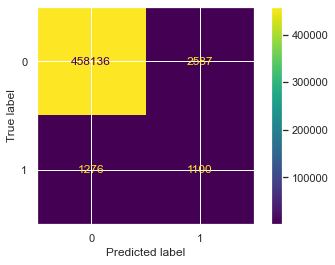

True Positive Rate: 0.46296296296296297
False Positive Rate: 0.00561508759059131
True Negative Rate: 0.9943849124094087





Decision Tree


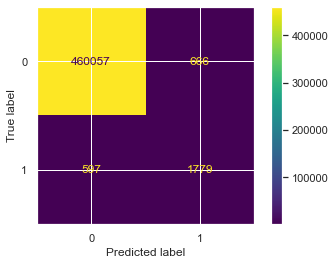

True Positive Rate: 0.7487373737373737
False Positive Rate: 0.0014455540530861277
True Negative Rate: 0.9985544459469139





Logistic Regression


/Users/xinyuwu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


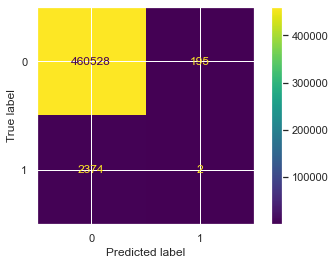

True Positive Rate: 0.0008417508417508417
False Positive Rate: 0.0004232478083360284
True Negative Rate: 0.999576752191664





Random Forest Classifier


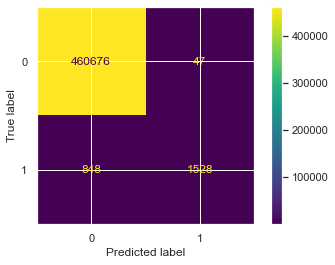

True Positive Rate: 0.6430976430976431
False Positive Rate: 0.00010201357431688889
True Negative Rate: 0.9998979864256831





In [79]:
# Performance visualizations for the base model
PerformanceViz(base_X, base_y)

# V. Model Tuning

In this section, we explore a number of different methods to improve upon our base models from above. The first is using SMOTE to resample the data and oversample the fraudulent data. This means that our distribution of 0's and 1's will be more balanced, and it'll be easier for the model to learn the actual feature importances of the data for the fradulent, 1, cases. We also implement feature selection to limit how many features we are using to prevent overfitting. Lastly, we use grid-search cross validation to find out which hyperparameters are best for each of the four different models.

## SMOTE Resampling

In [81]:
from collections import Counter
from imblearn.over_sampling import SMOTE

# Oversampling minority target values
sm = SMOTE(sampling_strategy = 'all', random_state=3000)
X_resampled, y_resampled = sm.fit_resample(base_X, base_y)



Gaussian Naive Bayes


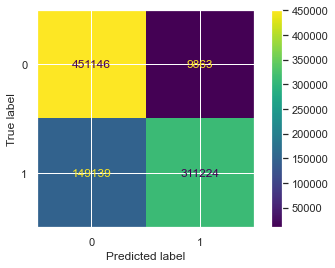

True Positive Rate: 0.6760404289658378
False Positive Rate: 0.021394376248619874
True Negative Rate: 0.9786056237513802



                       0              1  accuracy      macro avg   weighted avg
precision       0.751553       0.969282  0.827429       0.860418       0.860341
recall          0.978606       0.676040  0.827429       0.827323       0.827429
f1-score        0.850181       0.796530  0.827429       0.823355       0.823374
support    461009.000000  460363.000000  0.827429  921372.000000  921372.000000


Decision Tree


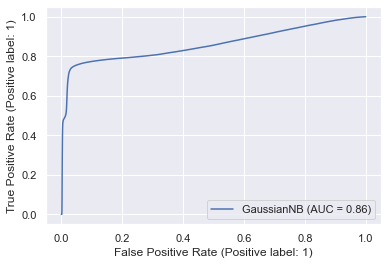

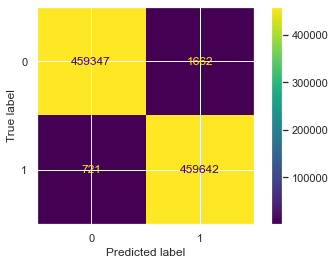

True Positive Rate: 0.9984338445965466
False Positive Rate: 0.0036051356914940922
True Negative Rate: 0.9963948643085059



                       0              1  accuracy      macro avg   weighted avg
precision       0.998433       0.996397  0.997414       0.997415       0.997416
recall          0.996395       0.998434  0.997414       0.997414       0.997414
f1-score        0.997413       0.997414  0.997414       0.997414       0.997414
support    461009.000000  460363.000000  0.997414  921372.000000  921372.000000


Logistic Regression


/Users/xinyuwu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


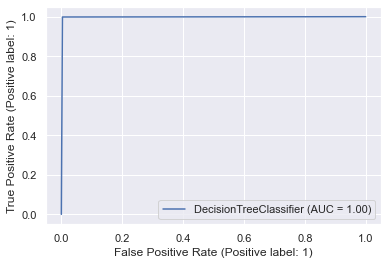

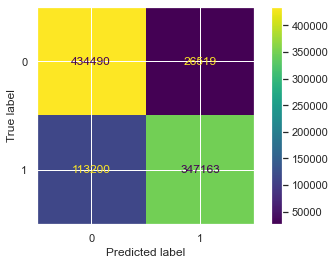

True Positive Rate: 0.7541070850611366
False Positive Rate: 0.05752382274532601
True Negative Rate: 0.942476177254674



                       0              1  accuracy      macro avg   weighted avg
precision       0.793314       0.929033  0.848358       0.861173       0.861126
recall          0.942476       0.754107  0.848358       0.848292       0.848358
f1-score        0.861486       0.832480  0.848358       0.846983       0.846993
support    461009.000000  460363.000000  0.848358  921372.000000  921372.000000


Random Forest Classifier


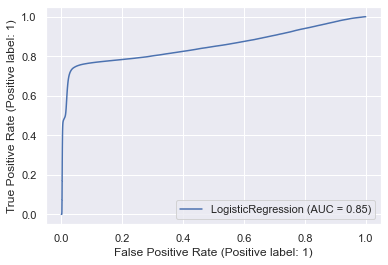

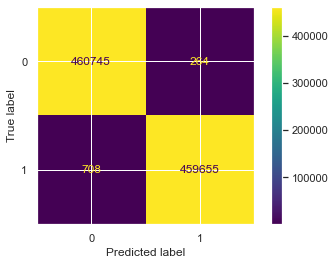

True Positive Rate: 0.9984620831821845
False Positive Rate: 0.00057265693294491
True Negative Rate: 0.999427343067055



                       0              1  accuracy      macro avg   weighted avg
precision       0.998466       0.999426  0.998945       0.998946       0.998946
recall          0.999427       0.998462  0.998945       0.998945       0.998945
f1-score        0.998946       0.998944  0.998945       0.998945       0.998945
support    461009.000000  460363.000000  0.998945  921372.000000  921372.000000


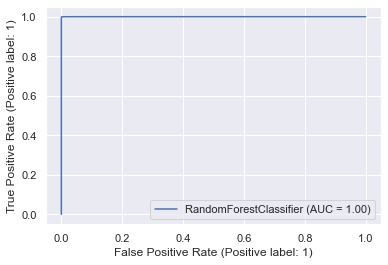

In [82]:
X_smote_train, X_smote_test, y_smote_train, y_smote_test = train_test_split(X_resampled, y_resampled, random_state=3000)

# Using train and test sets, run through each of the estimators
for name, estimator in estimators.items():
    print(f'\n\n{name}')
    model = estimator.fit(X=X_smote_train, y=y_smote_train)
    y_smote_pred = model.predict(X=X_smote_test)

    # Create and display confusion matrix
    conf_matrix = confusion_matrix(y_smote_test, y_smote_pred)
    tn, fp, fn, tp = confusion_matrix(y_smote_test, y_smote_pred).ravel()
    display = ConfusionMatrixDisplay(conf_matrix)
    display.plot()
    plt.show()

    print(f'True Positive Rate: {(tp/(tp+fn))}')
    print(f'False Positive Rate: {(fp/(fp+tn))}')
    print(f'True Negative Rate: {(tn/(tn+fp))}\n\n\n')

    # Print ROC curves for each model
    RocCurveDisplay.from_estimator(model, X_smote_test, y_smote_test)
    
    # Create and print classification report
    report = pd.DataFrame(classification_report(y_true=y_smote_test, y_pred=y_smote_pred, output_dict=True))
    print(report)

___

# VI. Conclusion

In comparing the different base models and SMOTE resampled models, it is clear that the Random Forest Classifier and the Decision Tree classifier outperform the Gaussian Naive Bayes and Logistic Regression models. However, it is important to note the significant difference in performance of the latter two when SMOTE resampling is applied. Therefore, next steps going forward would be to further tune these models. This could come in the form of trying other sampling techniques (i.e random sampling), using grid search cross-validation to identify the best parameters for each model, or even trying other models such as K-Nearest Neighbors and Support Vector Classifier. However, for the scope of this project, we are satisfied with our results. Using the SMOTE resampled Random Forest Classifier, we were able to achieve accuracy, precision, recall, and f1-scores of over 99% for both the fraudulent and non-fraudulent categories. Furthermore, we saw over 70% accuracy, precision, and recall for all of our models that were run on the SMOTE resampled dataset. Overall, this suggests that our models are able to predict credit card fraud and we successfully answered our initial problem of identifying and predicting cases of credit card fraud.